## Google’s Mobility Report
refer:[Google COVID-19](https://www.google.com/covid19/mobility/)





In [1]:
import numpy as np
import pandas as pd
import plotly as py
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from tabulate import tabulate
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [2]:
from google.colab import drive
drive.mount('/content/drive')
DATA_DIR = '/content/drive/My Drive/Colab Notebooks/DS_Final_pro/'
df_g = pd.read_csv(DATA_DIR + 'Global_Mobility_Report.csv')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.



In [4]:
df_g = df_g.rename(columns={'country_region':'Country',
                        'date':'Date',
                        'retail_and_recreation_percent_change_from_baseline':'retail',
                        'grocery_and_pharmacy_percent_change_from_baseline':'pharmacy',
                        'parks_percent_change_from_baseline':'parks',
                        'transit_stations_percent_change_from_baseline':'transit_station',
                        'workplaces_percent_change_from_baseline':'workplaces',
                        'residential_percent_change_from_baseline':'residential'
                        })

df = df_g.drop(['country_region_code','sub_region_1', 'sub_region_2'], axis=1)

In [5]:
df_all = df.groupby(['Date']).sum().reset_index().sort_values('Date', ascending=False)
temp = df_all.melt(id_vars='Date', value_vars=['retail', 'pharmacy', 'parks','transit_station', 'workplaces', 'residential'], 
                 var_name='Ratio', value_name='Value')
fig = px.line(temp, x="Date", y="Value", color='Ratio',
              title='Global Mobility Report',
              color_discrete_sequence=['#1a780d','#de04b6', '#1e14e0', '#750512', '#16e1f7', '#f29a16'])
fig.show()

* park, pharmacy

In [6]:
df_countries = df.groupby(['Country', 'Date']).mean().reset_index().sort_values('Date', ascending=False)
df_countries = df_countries.drop_duplicates(subset = ['Country'])
df_countrydate = df
df_countrydate = df_countrydate.groupby(['Date','Country']).mean().reset_index()
min_cases = df_countrydate['residential'].min()

In [7]:
df_country = df.groupby(['Country','Date']).mean().reset_index()
c1 = df_country[df_country['Country']=="New Zealand"]
c2 = df_country[df_country['Country']=="Brazil"]
c3 = df_country[df_country['Country']=='South Korea']
c4 = df_country[df_country['Country']=="United States"]
c5 = df_country[df_country['Country']=="Taiwan"]
c6 = df_country[df_country['Country']=='Russia']
c7 = df_country[df_country['Country']=='Vietnam']
c8 = df_country[df_country['Country']=="Italy"]
c9 = df_country[df_country['Country']=='Spain']
c10 = df_country[df_country['Country']=="United Kingdom"]
c11 = df_country[df_country['Country']=="Singapore"]
best = [c1, c3, c5, c7, c11]
euro = [c8, c9, c10]
worst = [c2, c4, c6]
bestcountries = pd.concat(best)
eurocountries = pd.concat(euro)
worstcountries = pd.concat(worst)

### retail

In [ ]:
fig = px.line(bestcountries, x="Date", y='retail', title='retail', color = 'Country')
fig.show()

In [ ]:
fig = px.line(eurocountries, x="Date", y='retail', title='retail', color = 'Country')
fig.show()

In [ ]:
fig = px.line(worstcountries, x="Date", y='retail', title='retail', color = 'Country')
fig.show()

* 韓國夜店群聚
* 紐西蘭人流控制
* 台灣沒有太大改變
* 歐美急於恢復

### pharmacy

In [ ]:
fig = px.line(bestcountries, x="Date", y='pharmacy', title='pharmacy', color = 'Country')
fig.show()

In [ ]:
fig = px.line(eurocountries, x="Date", y='pharmacy', title='pharmacy', color = 'Country')
fig.show()

In [ ]:
fig = px.line(worstcountries, x="Date", y='pharmacy', title='pharmacy', color = 'Country')
fig.show()

* 紐西蘭
* 東西方防疫概念

### parks

In [ ]:
fig = px.line(bestcountries, x="Date", y='parks', title='parks', color = 'Country')
fig.show()

In [ ]:
fig = px.line(eurocountries, x="Date", y='parks', title='parks', color = 'Country')
fig.show()

In [ ]:
fig = px.line(worstcountries, x="Date", y='parks', title='parks', color = 'Country')
fig.show()

* 從戶外開放人流

### transit_station

In [ ]:
fig = px.line(bestcountries, x="Date", y='transit_station', title='transit_station', color = 'Country')
fig.show()

In [ ]:
fig = px.line(eurocountries, x="Date", y='transit_station', title='transit_station', color = 'Country')
fig.show()

In [ ]:
fig = px.line(worstcountries, x="Date", y='transit_station', title='transit_station', color = 'Country')
fig.show()

* 亞洲密集大都市 vs 歐美

### workplaces

In [ ]:
fig = px.line(bestcountries, x="Date", y='workplaces', title='workplaces', color = 'Country')
fig.show()

In [ ]:
fig = px.line(eurocountries, x="Date", y='workplaces', title='workplaces', color = 'Country')
fig.show()

In [ ]:
fig = px.line(worstcountries, x="Date", y='workplaces', title='workplaces', color = 'Country')
fig.show()

* 期望恢復經濟
* 越南


### residential

In [ ]:
fig = px.line(bestcountries, x="Date", y='residential', title='residential', color = 'Country')
fig.show()

In [ ]:
fig = px.line(eurocountries, x="Date", y='residential', title='residential', color = 'Country')
fig.show()

In [ ]:
fig = px.line(worstcountries, x="Date", y='residential', title='residential', color = 'Country')
fig.show()

* 紐西蘭,越南

### some case

In [ ]:
df_c = df_country[df_country['Country']=="New Zealand"]
temp = df_c.melt(id_vars='Date', value_vars=['retail', 'pharmacy', 'parks','transit_station', 'workplaces', 'residential'], 
                 var_name='Ratio', value_name='Value')
fig = px.line(temp, x="Date", y="Value", color='Ratio',
              title='New Zealand Mobility Report',
              color_discrete_sequence=['#1a780d','#de04b6', '#1e14e0', '#750512', '#16e1f7', '#f29a16'])
fig.show()

In [ ]:
df_c = df_country[df_country['Country']=="Singapore"]
temp = df_c.melt(id_vars='Date', value_vars=['retail', 'pharmacy', 'parks','transit_station', 'workplaces', 'residential'], 
                 var_name='Ratio', value_name='Value')
fig = px.line(temp, x="Date", y="Value", color='Ratio',
              title='Singapore Mobility Report',
              color_discrete_sequence=['#1a780d','#de04b6', '#1e14e0', '#750512', '#16e1f7', '#f29a16'])
fig.show()

In [ ]:
df_c = df_country[df_country['Country']=="Taiwan"]
temp = df_c.melt(id_vars='Date', value_vars=['retail', 'pharmacy', 'parks','transit_station', 'workplaces', 'residential'], 
                 var_name='Ratio', value_name='Value')
fig = px.line(temp, x="Date", y="Value", color='Ratio',
              title='Taiwan Mobility Report',
              color_discrete_sequence=['#1a780d','#de04b6', '#1e14e0', '#750512', '#16e1f7', '#f29a16'])
fig.show()

In [ ]:
df_c = df_country[df_country['Country']=="Japan"]
temp = df_c.melt(id_vars='Date', value_vars=['retail', 'pharmacy', 'parks','transit_station', 'workplaces', 'residential'], 
                 var_name='Ratio', value_name='Value')
fig = px.line(temp, x="Date", y="Value", color='Ratio',
              title='Japan Mobility Report',
              color_discrete_sequence=['#1a780d','#de04b6', '#1e14e0', '#750512', '#16e1f7', '#f29a16'])
fig.show()

In [ ]:
df_c = df_country[df_country['Country']=="South Korea"]
temp = df_c.melt(id_vars='Date', value_vars=['retail', 'pharmacy', 'parks','transit_station', 'workplaces', 'residential'], 
                 var_name='Ratio', value_name='Value')
fig = px.line(temp, x="Date", y="Value", color='Ratio',
              title='South Korea Mobility Report',
              color_discrete_sequence=['#1a780d','#de04b6', '#1e14e0', '#750512', '#16e1f7', '#f29a16'])
fig.show()

In [ ]:
df_c = df_country[df_country['Country']=="Vietnam"]
temp = df_c.melt(id_vars='Date', value_vars=['retail', 'pharmacy', 'parks','transit_station', 'workplaces', 'residential'], 
                 var_name='Ratio', value_name='Value')
fig = px.line(temp, x="Date", y="Value", color='Ratio',
              title='Vietnam Mobility Report',
              color_discrete_sequence=['#1a780d','#de04b6', '#1e14e0', '#750512', '#16e1f7', '#f29a16'])
fig.show()

In [ ]:
df_c = df_country[df_country['Country']=="United States"]
temp = df_c.melt(id_vars='Date', value_vars=['retail', 'pharmacy', 'parks','transit_station', 'workplaces', 'residential'], 
                 var_name='Ratio', value_name='Value')
fig = px.line(temp, x="Date", y="Value", color='Ratio',
              title='United States Mobility Report',
              color_discrete_sequence=['#1a780d','#de04b6', '#1e14e0', '#750512', '#16e1f7', '#f29a16'])
fig.show()

In [ ]:
df_ny = df_g[df_g['sub_region_1'] == 'New York']
df_ny.drop(['country_region_code', 'sub_region_2'], axis=1, inplace = True)
df_ny = df_ny.groupby(['Country','Date']).mean().reset_index()
df_c = df_ny[['Date','retail', 'pharmacy', 'parks','transit_station', 'workplaces', 'residential']]
temp = df_c.melt(id_vars='Date', value_vars=['retail', 'pharmacy', 'parks','transit_station', 'workplaces', 'residential'], 
                 var_name='Ratio', value_name='Value')
fig = px.line(temp, x="Date", y="Value", color='Ratio',
              title='New York Mobility Report',
              color_discrete_sequence=['#1a780d','#de04b6', '#1e14e0', '#750512', '#16e1f7', '#f29a16'])
fig.show()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_ny = df_g[df_g['sub_region_1'] == 'Montana']
df_ny.drop(['country_region_code', 'sub_region_2'], axis=1, inplace = True)
df_ny = df_ny.groupby(['Country','Date']).mean().reset_index()
df_c = df_ny[['Date','retail', 'pharmacy', 'parks','transit_station', 'workplaces', 'residential']]
temp = df_c.melt(id_vars='Date', value_vars=['retail', 'pharmacy', 'parks','transit_station', 'workplaces', 'residential'], 
                 var_name='Ratio', value_name='Value')
fig = px.line(temp, x="Date", y="Value", color='Ratio',
              title='Montana Mobility Report',
              color_discrete_sequence=['#1a780d','#de04b6', '#1e14e0', '#750512', '#16e1f7', '#f29a16'])
fig.show()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_c = df_country[df_country['Country']=="United Kingdom"]
temp = df_c.melt(id_vars='Date', value_vars=['retail', 'pharmacy', 'parks','transit_station', 'workplaces', 'residential'], 
                 var_name='Ratio', value_name='Value')
fig = px.line(temp, x="Date", y="Value", color='Ratio',
              title='United Kingdom Mobility Report',
              color_discrete_sequence=['#1a780d','#de04b6', '#1e14e0', '#750512', '#16e1f7', '#f29a16'])
fig.show()

In [ ]:
df_c = df_country[df_country['Country']=="Brazil"]
temp = df_c.melt(id_vars='Date', value_vars=['retail', 'pharmacy', 'parks','transit_station', 'workplaces', 'residential'], 
                 var_name='Ratio', value_name='Value')
fig = px.line(temp, x="Date", y="Value", color='Ratio',
              title='Brazil Mobility Report',
              color_discrete_sequence=['#1a780d','#de04b6', '#1e14e0', '#750512', '#16e1f7', '#f29a16'])
fig.show()

* 越南,新加坡,紐西蘭
* 台日韓
* 美國

### relation with covid 19 case

In [21]:
url = 'https://raw.githubusercontent.com/imdevskp/covid_19_jhu_data_web_scrap_and_cleaning/master/covid_19_clean_complete.csv'
case = pd.read_csv(url, parse_dates=['Date'])
case.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.1533,20.1683,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.0339,1.6596,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.5063,1.5218,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.2027,17.8739,2020-01-22,0,0,0,0,Africa


In [22]:
case_all = case.groupby(['Date'])['Confirmed'].sum().reset_index().sort_values('Date', ascending=False)
case_all = case_all.set_index('Date')


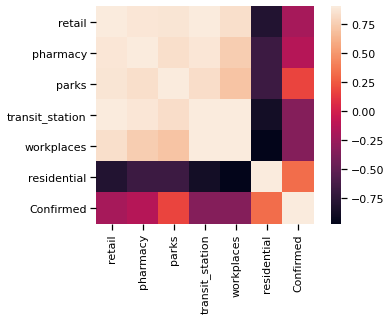

In [27]:
temp = df_all
temp = temp.set_index('Date')
temp = temp.join(case_all,how='inner')
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2,'font.family': [u'times']})
temp = temp.drop(['census_fips_code'],axis = 1)
corrmat = temp.corr()
sns.heatmap(corrmat, vmax = .9, square = True)

* (-) 因此得到控制,(+)(0)不及散播速度或人流控制不足

In [35]:
case[case['Country/Region']=='New Zealand'].set_index('Date')['Confirmed']

Date
2020-01-22       0
2020-01-23       0
2020-01-24       0
2020-01-25       0
2020-01-26       0
              ... 
2020-06-18    1507
2020-06-19    1509
2020-06-20    1511
2020-06-21    1513
2020-06-22    1515
Name: Confirmed, Length: 153, dtype: int64

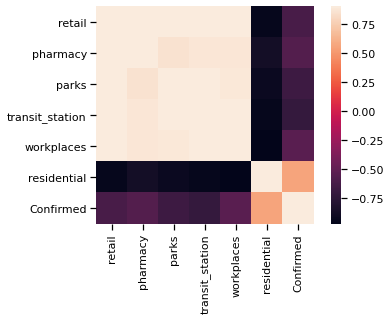

In [37]:
temp = df_country[df_country['Country']=="New Zealand"].set_index('Date')
temp = temp.join(case[case['Country/Region']=='New Zealand'].set_index('Date')['Confirmed'],how='inner')
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2,'font.family': [u'times']})
temp = temp.drop(['Country','census_fips_code'],axis = 1)
corrmat = temp.corr()
sns.heatmap(corrmat, vmax = .9, square = True)

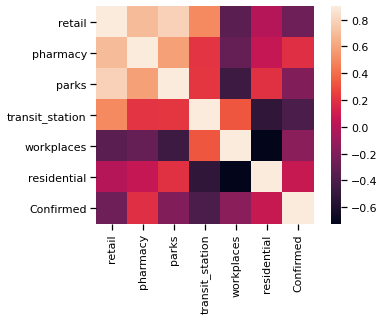

In [38]:
temp = df_country[df_country['Country']=="Taiwan"].set_index('Date')
temp = temp.join(case[case['Country/Region']=='Taiwan*'].set_index('Date')['Confirmed'],how='inner')
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2,'font.family': [u'times']})
temp = temp.drop(['Country','census_fips_code'],axis = 1)
corrmat = temp.corr()
sns.heatmap(corrmat, vmax = .9, square = True)

* 大眾運輸,工作

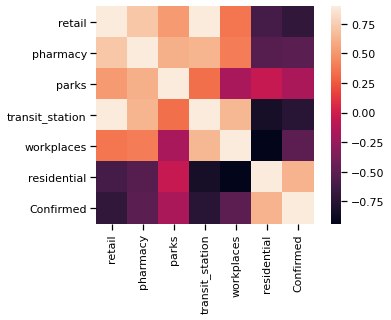

In [39]:
temp = df_country[df_country['Country']=="Japan"].set_index('Date')
temp = temp.join(case[case['Country/Region']=='Japan'].set_index('Date')['Confirmed'],how='inner')
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2,'font.family': [u'times']})
temp = temp.drop(['Country','census_fips_code'],axis = 1)
corrmat = temp.corr()
sns.heatmap(corrmat, vmax = .9, square = True)

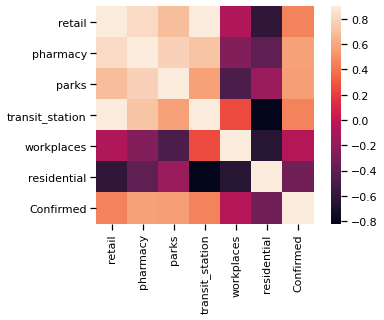

In [42]:
temp = df_country[df_country['Country']=="South Korea"].set_index('Date')
temp = temp.join(case[case['Country/Region']=='South Korea'].set_index('Date')['Confirmed'],how='inner')
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2,'font.family': [u'times']})
temp = temp.drop(['Country','census_fips_code'],axis = 1)
corrmat = temp.corr()
sns.heatmap(corrmat, vmax = .9, square = True)

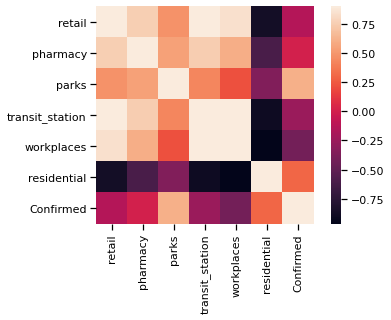

In [43]:
temp = df_country[df_country['Country']=="United States"].set_index('Date')
temp = temp.join(case[case['Country/Region']=='US'].set_index('Date')['Confirmed'],how='inner')
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2,'font.family': [u'times']})
temp = temp.drop(['Country','census_fips_code'],axis = 1)
corrmat = temp.corr()
sns.heatmap(corrmat, vmax = .9, square = True)

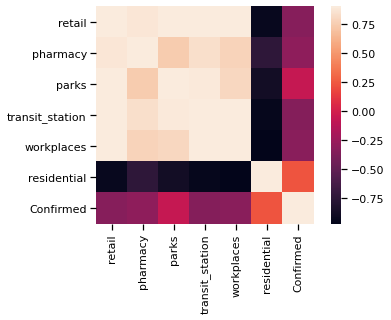

In [44]:
# United Kingdom
temp = df_country[df_country['Country']=="Italy"].set_index('Date')
temp = temp.join(case[case['Country/Region']=='Italy'].set_index('Date')['Confirmed'],how='inner')
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2,'font.family': [u'times']})
temp = temp.drop(['Country','census_fips_code'],axis = 1)
corrmat = temp.corr()
sns.heatmap(corrmat, vmax = .9, square = True)


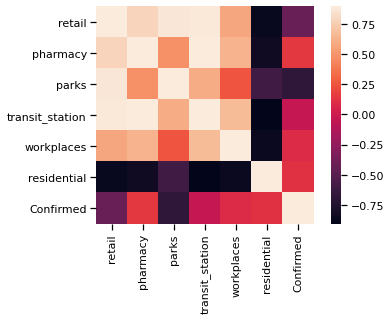

In [45]:
temp = df_country[df_country['Country']=="Vietnam"].set_index('Date')
temp = temp.join(case[case['Country/Region']=='Vietnam'].set_index('Date')['Confirmed'],how='inner')
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2,'font.family': [u'times']})
temp = temp.drop(['Country','census_fips_code'],axis = 1)
corrmat = temp.corr()
sns.heatmap(corrmat, vmax = .9, square = True)


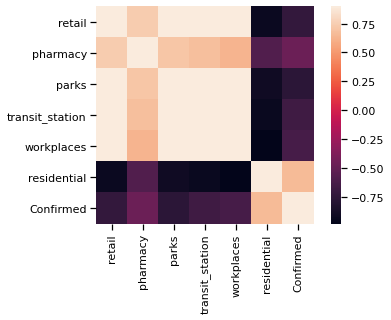

In [46]:
temp = df_country[df_country['Country']=="Singapore"].set_index('Date')
temp = temp.join(case[case['Country/Region']=='Singapore'].set_index('Date')['Confirmed'],how='inner')
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2,'font.family': [u'times']})
temp = temp.drop(['Country','census_fips_code'],axis = 1)
corrmat = temp.corr()
sns.heatmap(corrmat, vmax = .9, square = True)